In [73]:
#1
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

#2
webdriver_opthons=webdriver.ChromeOptions()
webdriver_opthons.add_argument('headless')

url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page=1'

driver = webdriver.Chrome(options=webdriver_opthons)
driver.get(url)
driver.implicitly_wait(10)

#3
soup = BeautifulSoup(driver.page_source, 'html.parser')

date=soup.select('.p10')
for index, d in enumerate(date):
    date[index]=d.string
date

all_data=soup.select('.p11')
종가=[]
전일비=[]
시가=[]
고가=[]
저가=[]
거래량=[]
for index, d in enumerate(all_data):
    all_data[index]=d.string

#3, 4
for index, p in enumerate(all_data):
    if (index+1) % 6 == 1:
        종가.append(p.string.replace(',',''))
    elif (index+1) % 6 == 2:
        전일비.append(p.string.strip('\n').strip('\t').strip('\n').replace(',',''))
    elif (index+1) % 6 == 3:
        시가.append(p.string.replace(',',''))
    elif (index+1) % 6 == 4:
        고가.append(p.string.replace(',',''))
    elif (index+1) % 6 == 5:
        저가.append(p.string.replace(',',''))
    elif (index+1) % 6 == 0:
        거래량.append(p.string.replace(',',''))

#5
df = pd.DataFrame({'날짜':date,'종가':종가,'전일비':전일비,'시가':시가,'고가':고가,'저가':저가,'거래량':거래량})
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2022.05.02,67300,100,66600,67600,66500,14058886
1,2022.04.29,67400,2600,65100,67600,65000,26190390
2,2022.04.28,64800,200,65400,65500,64500,16895527
3,2022.04.27,65000,1100,65400,65500,64900,18122084
4,2022.04.26,66100,200,66400,66700,66100,12946923
5,2022.04.25,66300,700,66500,66700,66300,11016474
6,2022.04.22,67000,700,67200,67300,66700,11791478
7,2022.04.21,67700,300,67600,68300,67500,12847448
8,2022.04.20,67400,100,67000,67400,66500,16693293
9,2022.04.19,67300,600,67100,68000,67000,12959434


In [74]:
#6
df.set_index("날짜", inplace=True)
df

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2022.05.02,67300,100,66600,67600,66500,14058886
2022.04.29,67400,2600,65100,67600,65000,26190390
2022.04.28,64800,200,65400,65500,64500,16895527
2022.04.27,65000,1100,65400,65500,64900,18122084
2022.04.26,66100,200,66400,66700,66100,12946923
2022.04.25,66300,700,66500,66700,66300,11016474
2022.04.22,67000,700,67200,67300,66700,11791478
2022.04.21,67700,300,67600,68300,67500,12847448
2022.04.20,67400,100,67000,67400,66500,16693293


In [75]:
#7
for i in range(0, len(df["종가"])):
    df['종가'][i]=int(df['종가'][i])
    df['전일비'][i]=int(df['전일비'][i])
    df['시가'][i]=int(df['시가'][i])
    df['거래량'][i]=int(df['고가'][i])
    df['저가'][i]=int(df['저가'][i])
    df['거래량'][i]=int(df['거래량'][i])

#8    
answer8=df["종가"]
answer8

날짜
2022.05.02    67300
2022.04.29    67400
2022.04.28    64800
2022.04.27    65000
2022.04.26    66100
2022.04.25    66300
2022.04.22    67000
2022.04.21    67700
2022.04.20    67400
2022.04.19    67300
Name: 종가, dtype: object

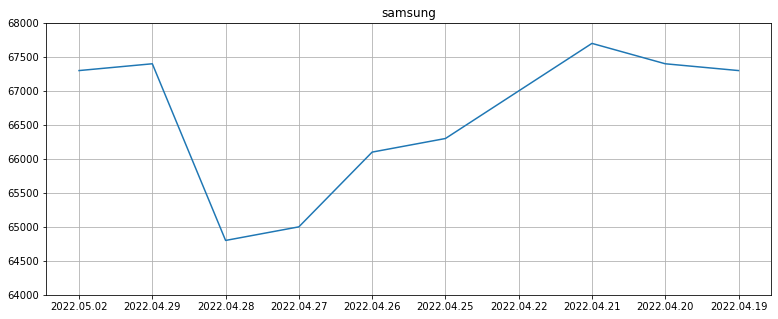

In [76]:
#9 10 11

plt.figure(figsize=(13, 5))
plt.plot(answer8.index, answer8.array)# X, Y
plt.title('samsung')# 제목
plt.ylim(64000,68000)
plt.yticks([64000,64500,65000,65500,66000,66500,67000,67500,68000],labels=['64000','64500','65000','65500','66000','66500','67000','67500','68000'])
plt.grid()# 격자선
plt.show()